## Linear Regression with Python- Case study
Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.

'Avg. Area House Age': Avg Age of Houses in same city

'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city

'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city

'Area Population': Population of city house is located in

'Price': Price that the house sold at

'Address': Address for the house



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [6]:
housing = pd.read_csv('USA_Housing.csv')

## Check out Data 

In [7]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [12]:
housing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [13]:
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Exploratory Data Analysis

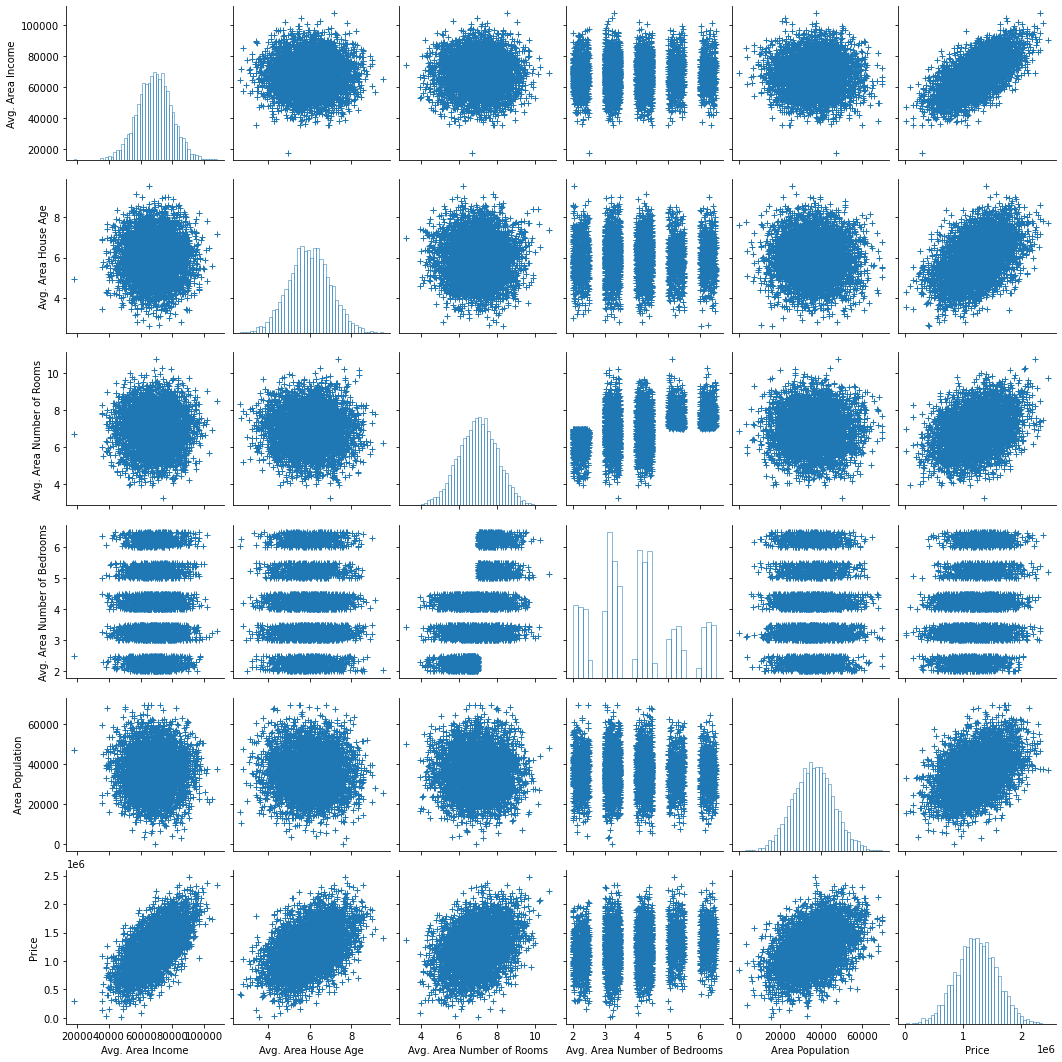

In [33]:
sns.pairplot(
    housing,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

We can observe from the pair plot, that  Average Income, House Age, Number of Rooms, and Area Population are positively correlated to the Housing Price. Number of Bedrooms is slightly correlated to the Housing Price. 

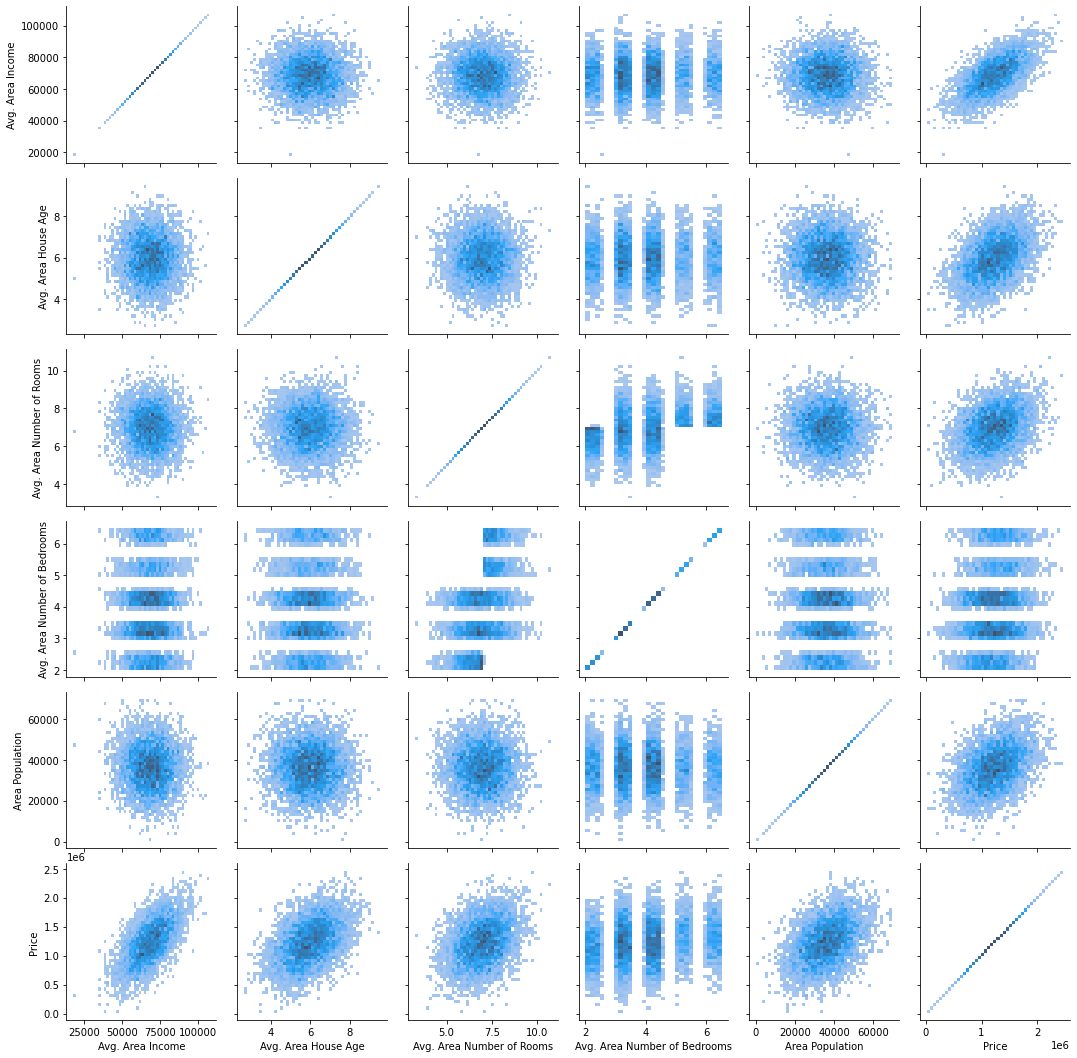

In [30]:
a = sns.PairGrid(housing)
a.map(sns.histplot)

<AxesSubplot:>

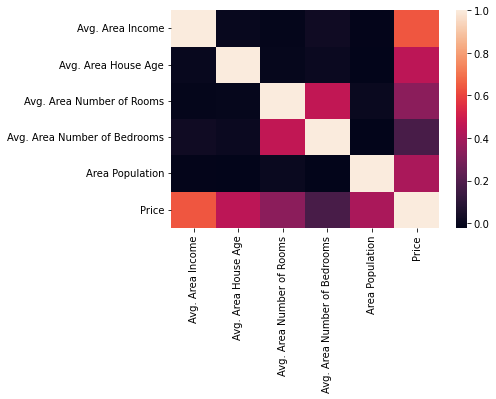

In [41]:
sns.heatmap(housing.corr())

The heatmap above show how highly correlated each variable is to each other. If we look from the perspective as to how correlated is each variable to the Price, the heatmap shows that Average Income is highly correlated with Price. This gives us an idea that in areas where Average Income is high, Real Estate prices will be high as well.

## Training the Linear Regression Model

In [45]:
x = USAhousing.drop(['Price','Address'], axis = 1)
y = USAhousing['Price']

In [46]:
print(x)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09      23086.80050  
1  

In [47]:
print(y)

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64


The "x" data will our features data which includes income, no. rooms, no. of bedrooms, population and housing age and will help us to determine the house prices from the model. The "y" is price which is our target variable to predict. 

## Split the Dataset into Train and Test model

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [51]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

3500
1500
3500
1500


The overall length of the housing data is 5000. We have split the data into two sets; Train, where we will train our model and Test, where we will evaluate our model. 70% of the dataset is used to train the model, while we will test our model on the remaining 30% of the dataset.

## Creating and Training our Model

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lm = LinearRegression(normalize=True)

In [54]:
lm.fit(x_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

## Model Evaluation

In [55]:
print(lm.coef_)

[2.15553119e+01 1.65514758e+05 1.19304409e+05 1.28025799e+03
 1.51875921e+01]


In [56]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.555312
Avg. Area House Age,165514.758370
Avg. Area Number of Rooms,119304.408665
Avg. Area Number of Bedrooms,1280.257995
Area Population,15.187592


## Interpreting the Coefficients 

1)Holding everything constant, a 1 unit increase in Average Income will result in $21.56 increase in the prices. 

2)Holding everything constant, a 1 unit increase in Average House Age will result in $165,514.76 increase in the prices. 

3)Holding everything constant, a 1 unit increase in Average Number of Rooms will result in $119,304.41 increase in the prices. 

4)Holding everything constant, a 1 unit increase in Average Number of Bedrooms will result in $1280.26 increase in the prices. 

5)Holding everything constant, a 1 unit increase in Area Population will result in $15.19 increase in the prices. 

## Predictions from Dataset

In [58]:
predictions = lm.predict(x_test)

In [61]:
print(predictions)

[1568366.86225582  948538.40693049 1318352.14380195 ... 1376244.80923682
  756142.0567325  1166930.13092701]


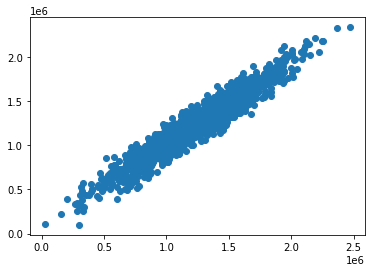

In [60]:
plt.scatter(y_test,predictions)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


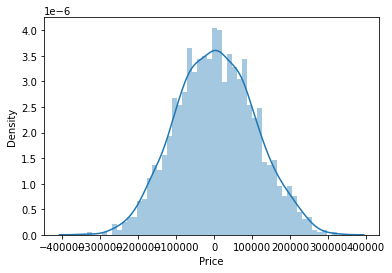

In [64]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics

In [65]:
from sklearn import metrics

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))

MAE: 83406.98216891848
MSE: 10654955402.6464
RMSE: 103222.84341484883
R2: 0.91849894966313
